In [ ]:
# outliers in eda are those data points that fluctuate the mean significantly 
#  

In [2]:
import numpy as np
import pandas as pd

In [4]:
# Ensure the file is a valid CSV file
df = pd.read_csv('newplacementdata.csv')  # Replace 'your_valid_file.csv' with the actual CSV file path

In [5]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [6]:
# even = ((n/2) + ((n/2)+1))/2
# odd = ((n/2)+1

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

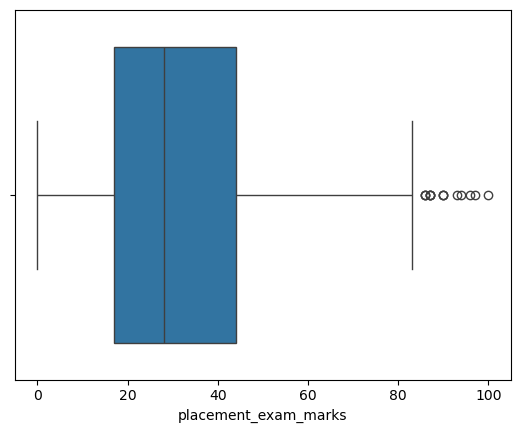

In [9]:
sns.boxplot(x = df['placement_exam_marks'])

In [10]:
# finding the Irq = inter quartile range
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)



In [11]:
percentile25

17.0

In [12]:
percentile75

44.0

In [13]:
IQR = percentile75 - percentile25
print("IQR:", IQR)

IQR: 27.0


In [14]:
upper_limit = percentile75 + 1.5*IQR
upper_limit 

84.5

In [15]:
lower_limit = percentile25 - 1.5*IQR
lower_limit

-23.5

In [16]:
# FINDING OUTLIRERS 

In [17]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [ ]:
# TWO METHODS TO REMOVE OULIRERS 
# # Trimming |•--> 4(Lower)....1 , upper(25) ...• (50) --> here 1,50 are outliers ---›

# lower (4) <----> upper (25) mid data 

# capping --› 4(Lower) -----1 , upper(25) ....(50)--->capping Lower point lowest point(1)
#  upper point upper point (50) ----> Range expanded --> outliers removed .



In [1]:
# triming 
newdf = df[df['placement_exam_marks']<upper_limit]

NameError: name 'df' is not defined

In [20]:
# newdf

In [21]:
# comparison

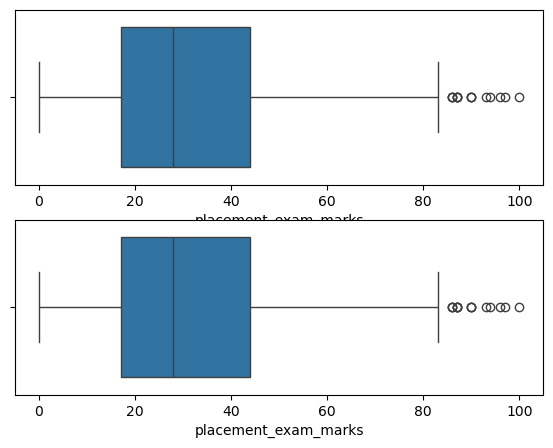

In [22]:
plt.figure(figsize = (15,5))


plt.subplot(222)
sns.boxplot(x = df['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(x = df['placement_exam_marks'])
plt.show()

In [23]:
# capping (outlier removving tech )


In [ ]:
new_df_cap = newdf.copy()  # Create a copy of newdf
new_df_cap['placement_exam_marks'] = np.where(
	new_df_cap['placement_exam_marks'] > upper_limit, 
	upper_limit, 
	np.where(new_df_cap['placement_exam_marks'] < lower_limit, lower_limit, new_df_cap['placement_exam_marks'])
)

In [27]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [28]:
new_df_cap.shape

(985, 3)

In [31]:
# comparison

<function matplotlib.pyplot.show(close=None, block=None)>

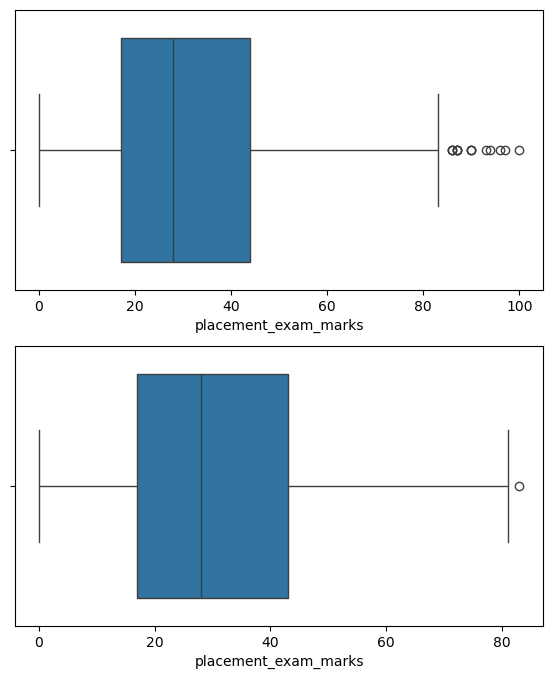

In [30]:
plt. figure(figsize = (15,8))
plt.subplot(222)
sns.boxplot(x=df["placement_exam_marks"])
plt.subplot (224)
sns.boxplot(x=new_df_cap['placement_exam_marks'])
plt.show